In [1]:
import bpy
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
import tempfile

In [2]:
def get_img(size=[480,640]):
    scene = bpy.context.scene
    scene.render.resolution_x = size[1]
    scene.render.resolution_y = size[0]
    scene.render.resolution_percentage = 100
    tmpdir=tempfile.TemporaryDirectory()
    scene.render.filepath=tmpdir.name+"/hoge"
    bpy.ops.render.render(write_still=True)
    img=Image.open(tmpdir.name+"/hoge.png")
    tmpdir.cleanup()
    return img

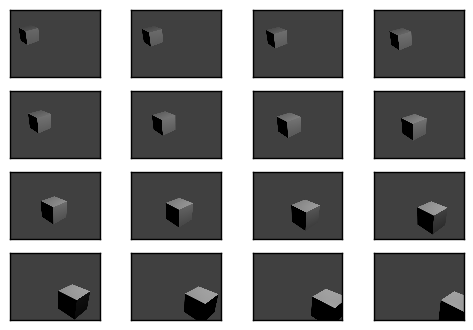

In [3]:
c=bpy.data.objects['Cube']

xnum=4
ynum=4
for i,x in enumerate(np.linspace(-5,5,xnum*ynum)):
    c.location.x=x
    plt.subplot(ynum,xnum,i+1)
    plt.imshow(get_img())
    plt.xticks([]);plt.yticks([])
plt.show()